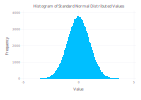

In [1]:
using Random
using Distributions
using Gadfly
Gadfly.push_theme(Theme(background_color="white"))
# Generate 10,000 standard normal distributed values

mean = 0
std_dev = 1

dist = Normal(mean, std_dev)

data = rand(dist, 1000000)

# Create a plot
plot(x=data, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Histogram of Standard Normal Distributed Values"))


In [2]:
function generate_n_bit_numbers(n)
    numbers = []
    for i in 0:(2^n - 1)
        binary_str = bitstring(i)[end-n+1:end]
        transformed = [c == '0' ? -1 : 1 for c in binary_str]
        push!(numbers, transformed)
    end
    return numbers
end

n = 3  # Example for 3-bit numbers
weights = generate_n_bit_numbers(n)

8-element Vector{Any}:
 [-1, -1, -1]
 [-1, -1, 1]
 [-1, 1, -1]
 [-1, 1, 1]
 [1, -1, -1]
 [1, -1, 1]
 [1, 1, -1]
 [1, 1, 1]

In [4]:
# Generate Linear Combinations of the n chunks 

struct LinearCombination
    weights::Vector{Int}
    value::Float32
end 

struct LinearCombinationSet
    combination::Vector{LinearCombination}
end 

lincombs = collect(
    map(
        set -> begin
            LinearCombinationSet(
                collect(map(
                    weights -> begin
                        LinearCombination(weights, sum(weights .* set))
                    end,
                    weights
                ))
            )
        end, 
        Iterators.partition(data, n)
    )
)

333334-element Vector{LinearCombinationSet}:
 LinearCombinationSet(LinearCombination[LinearCombination([-1, -1, -1], 1.4165473f0), LinearCombination([-1, -1, 1], 3.9640372f0), LinearCombination([-1, 1, -1], -1.6909068f0), LinearCombination([-1, 1, 1], 0.85658306f0), LinearCombination([1, -1, -1], -0.85658306f0), LinearCombination([1, -1, 1], 1.6909068f0), LinearCombination([1, 1, -1], -3.9640372f0), LinearCombination([1, 1, 1], -1.4165473f0)])
 LinearCombinationSet(LinearCombination[LinearCombination([-1, -1, -1], 2.167938f0), LinearCombination([-1, -1, 1], -1.4061192f0), LinearCombination([-1, 1, -1], 2.2131922f0), LinearCombination([-1, 1, 1], -1.360865f0), LinearCombination([1, -1, -1], 1.360865f0), LinearCombination([1, -1, 1], -2.2131922f0), LinearCombination([1, 1, -1], 1.4061192f0), LinearCombination([1, 1, 1], -2.167938f0)])
 LinearCombinationSet(LinearCombination[LinearCombination([-1, -1, -1], 0.116179526f0), LinearCombination([-1, -1, 1], -0.12326962f0), LinearCombination([-

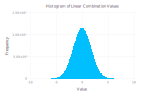

In [8]:
# plot all the values that fall out of this linear combination Vector

# Extract all the values to bastel them in there: 

lincomb_raw = reduce(vcat, map(set -> map(lc -> lc.value, set.combination), lincombs))

plot(x=lincomb_raw, Geom.histogram(bincount=1000), Guide.xlabel("Value"), Guide.ylabel("Frequency"), Guide.title("Histogram of Linear Combination Values"))